In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("/Users/priyanka/Downloads/mrleyedataset/Close-Eyes/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)

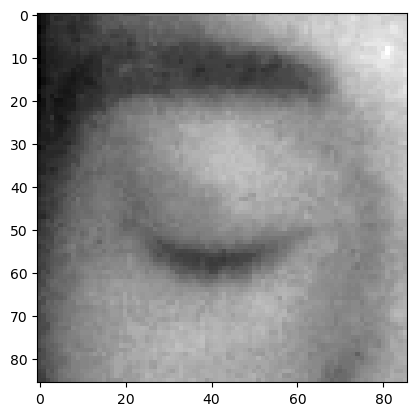

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(86, 86)

Checking path: /Users/priyanka/Downloads/mrleyedataset/Close-Eyes


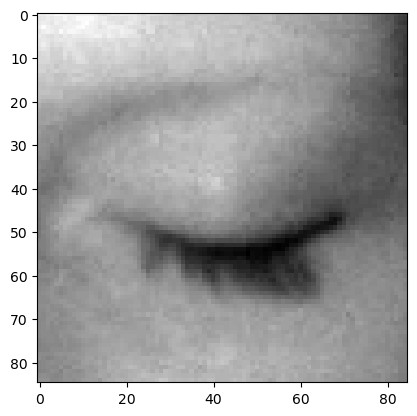

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

Datadirectory = "/Users/priyanka/Downloads/mrleyedataset"  # Training dataset path
Classes = ["Close-Eyes", "Open-Eyes"]  # List of classes

for category in Classes:
    path = os.path.join(Datadirectory, category)  # Path to category folder
    print(f"Checking path: {path}")  # Debugging step
    
    if not os.path.exists(path):
        print(f"Error: The directory '{path}' does not exist.")
        continue  # Skip this category if the folder is missing

    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        
        # Check if the file is actually an image
        if not img.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Skipping non-image file: {img}")
            continue

        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img_array is None:
            print(f"Warning: Unable to read image {img_path}")
            continue  # Skip if image loading failed

        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

        plt.imshow(img_array, cmap="gray")
        plt.show()
        break  # Remove this if you want to process all images
    break  # Remove this if you want to process all categories


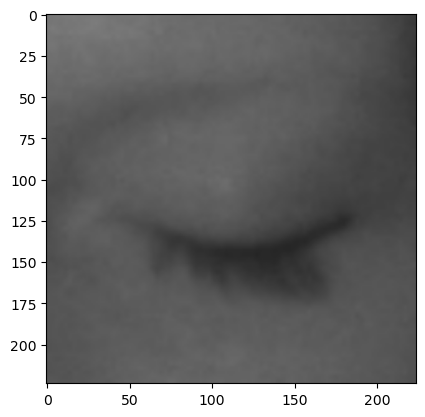

In [6]:
img_size= 224
new_array= cv2.resize(backtorgb, (img_size, img_size))
plt. imshow(new_array, cmap="gray")
plt. show()

In [7]:
training_Data = []

def create_training_Data(): 
    for category in Classes:
        path = os. path. join (Datadirectory, category)
        class_num = Classes.index(category) ## 0 1,
        for img in os.listdir(path):
            try:
                img_array = cv2. imread (os. path. join(path, img), cv2. IMREAD_GRAYSCALE)
                backtorgb = cv2. cvtColor(img_array, cv2. COLOR,_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass


In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

0


In [10]:
import random

random.shuffle(training_Data)

In [11]:
x = []
y = []

for features, label in training_Data:
    x.append (features)
    y.append (label)
    
x = np. array(x). reshape(-1, img_size, img_size, 3)

In [12]:
x.shape

(0, 224, 224, 3)

In [13]:
x=x/255.0;

In [14]:
y=np.array(y)

In [15]:
import pickle

pickle_out = open ("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open ("y-pickle", "wb")
pickle.dump (y, pickle_out)
pickle_out.close()


In [16]:
pickle_in = open("X.pickle", "rb")
X = pickle. load (pickle_in)
pickle_in = open ("y-pickle", "rb" )
y = pickle.load(pickle_in)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-4].output

In [22]:
Flat_layer= layers.Flatten() (base_output)
final_output = layers. Dense(1) (Flat_layer) ## one node (1/ 0)
final_ouput = layers.Activation('sigmoid')(final_output)

In [23]:
print(base_input)


[]


In [24]:
from tensorflow import keras

base_input = keras.Input(shape=(224, 224, 3))  # Example input shape for an image model


In [25]:
print(final_output)


<KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=keras_tensor_92>


In [26]:
new_model = keras.Model(inputs=base_input, outputs=final_output)


In [27]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        128 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1           │ (None, 112, 112,  │        288 │ conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_bn        │ (None, 112, 112,  │        128 │ conv_dw_1[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_1_relu      │ (None, 112, 112,  │          0 │ conv_dw_1_bn[0][… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1 (Conv2D)  │ (None, 112, 112,  │      2,048 │ conv_dw_1_relu[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_bn        │ (None, 112, 112,  │        256 │ conv_pw_1[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_1_relu      │ (None, 112, 112,  │          0 │ conv_pw_1_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pad_2          │ (None, 113, 113,  │          0 │ conv_pw_1_relu[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2           │ (None, 56, 56,    │        576 │ conv_pad_2[0][0]  │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_bn        │ (None, 56, 56,    │        256 │ conv_dw_2[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_dw_2_relu      │ (None, 56, 56,    │          0 │ conv_dw_2_bn[0][… │
│ (ReLU)              │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2 (Conv2D)  │ (None, 56, 56,    │      8,192 │ conv_dw_2_relu[0… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_bn        │ (None, 56, 56,    │        512 │ conv_pw_2[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_pw_2_relu      │ (None, 56, 56,    │          0 │ conv_pw_2_bn[0][

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [28]:
new_model. compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [29]:
print(len(x), len(y))


0 0


In [30]:
import numpy as np

if not isinstance(x, np.ndarray):
    x = np.array(x, dtype="float32")  # Convert to NumPy array


In [31]:
y = np.array(y, dtype="int")


In [32]:
import tensorflow as tf

dataset_path = "/Users/priyanka/Downloads/mrleyedataset"  # ✅ Corrected path

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,  # 10% validation
    subset="training",
    seed=123,  # Ensure reproducibility
    image_size=(224, 224),  # Resize images
    batch_size=32  # Set batch size
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

print(f"Training samples: {len(train_ds)}")
print(f"Validation samples: {len(val_ds)}")


Found 84898 files belonging to 2 classes.
Using 76409 files for training.
Found 84898 files belonging to 2 classes.
Using 8489 files for validation.
Training samples: 2388
Validation samples: 266


In [33]:
ls /Users/priyanka/Downloads/mrleyedataset


Close-Eyes/ Open-Eyes/


In [34]:
import os

dataset_path = "/Users/priyanka/Downloads/mrleyedataset"
print(os.listdir(dataset_path))  # Should show ['close-eyes', 'open-eyes']
print(os.listdir(os.path.join(dataset_path, 'close-eyes')))  # Should show image files


['Close-Eyes', '.DS_Store', 'Open-Eyes']
['s0036_00513_1_0_0_0_0_01.png', 's0014_03016_0_1_0_2_0_01.png', 's0037_00455_1_0_0_0_0_01.png', 's0011_00631_0_0_0_0_0_01.png', 's0012_03237_0_1_0_0_0_01.png', 's0019_01148_0_0_0_0_0_01.png', 's0014_00139_0_0_0_0_0_01.png', 's0037_05974_1_1_0_0_0_01.png', 's0036_00791_1_0_0_0_1_01.png', 's0019_02702_0_0_0_0_0_01.png', 's0037_03022_1_0_0_0_0_01.png', 's0037_05345_1_1_0_2_0_01.png', 's0001_00947_0_1_0_2_0_01.png', 's0036_00847_1_1_0_0_0_01.png', 's0037_00668_1_0_0_0_0_01.png', 's0003_00241_0_0_0_0_0_01.png', 's0012_03806_0_1_0_2_0_01.png', 's0014_00304_0_0_0_0_0_01.png', 's0014_02586_0_1_0_0_0_01.png', 's0002_00307_0_0_0_0_0_01.png', 's0006_00212_0_1_0_2_0_01.png', 's0012_03838_0_1_0_2_0_01.png', 's0002_00339_0_0_0_0_0_01.png', 's0012_02911_0_1_0_1_1_01.png', 's0012_01434_0_0_0_0_1_01.png', 's0019_02501_0_0_0_0_0_01.png', 's0014_03570_0_0_0_0_0_01.png', 's0012_02799_0_1_0_2_0_01.png', 's0013_00851_0_0_0_0_0_01.png', 's0001_00979_0_1_0_2_0_01.png'

In [35]:
new_model.fit(x,y, epochs = 5,validation_split = 0.1)

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.1`. Either provide more data, or a different value for the `validation_split` argument.

In [36]:
new_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m13900119760\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(None, 224, 224, 3), dtype=float32)\n  • training=True\n  • mask=None'

In [37]:
for images, labels in train_ds.take(1):
    print("Image shape:", images.shape)  # Should be (batch_size, 224, 224, 3)
    print("Label shape:", labels.shape)  # Should be (batch_size,)


Image shape: (32, 224, 224, 3)
Label shape: (32,)


2025-03-15 21:05:09.802948: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
train_ds = train_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))
val_ds = val_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))


ValueError: in user code:

    File "/var/folders/4m/sbv63jz12hdd574f_0zrf6k40000gn/T/ipykernel_4568/1156926863.py", line 1, in None  *
        lambda x, y: (tf.image.grayscale_to_rgb(x), y)

    ValueError: Dimension 3 in both shapes must be equal, but are 9 and 3. Shapes are [?,224,224,9] and [?,224,224,3].


In [ ]:
for image, label in train_ds.take(1):
    print(image.shape)


In [39]:
train_ds = train_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x[..., :1]), y))
val_ds = val_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x[..., :1]), y))


In [40]:
train_ds = train_ds.map(lambda x, y: (tf.stack([x[..., 0], x[..., 1], x[..., 2]], axis=-1), y))
val_ds = val_ds.map(lambda x, y: (tf.stack([x[..., 0], x[..., 1], x[..., 2]], axis=-1), y))


In [41]:
train_ds = train_ds.map(lambda x, y: (tf.image.rgb_to_grayscale(x[..., :3]), y))
train_ds = train_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))


In [42]:
train_ds = train_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))
val_ds = val_ds.map(lambda x, y: (tf.image.grayscale_to_rgb(x), y))

ValueError: in user code:

    File "/var/folders/4m/sbv63jz12hdd574f_0zrf6k40000gn/T/ipykernel_4568/1156926863.py", line 1, in None  *
        lambda x, y: (tf.image.grayscale_to_rgb(x), y)

    ValueError: Dimension 3 in both shapes must be equal, but are 9 and 3. Shapes are [?,224,224,9] and [?,224,224,3].


In [43]:
print(f"Type of x: {type(x)}")
print(f"Type of y: {type(y)}")


Type of x: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


In [44]:
new_model.save('my_model.h5')

In [45]:
new_model.save("my_model_drowsiness.keras")  # New recommended format

In [46]:
new_model = tf.keras.models.load_model("my_model_drowsiness.keras")

/Users/priyanka/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 85 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [47]:
img_array = cv2.imread('/Users/priyanka/Downloads/mrleyedataset/Close-Eyes/s0037_05811_1_1_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

if img_array is None:
    raise ValueError("Error: Image not found or failed to load.")

backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))


In [48]:
x_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [49]:
x_input.shape

(1, 224, 224, 3)

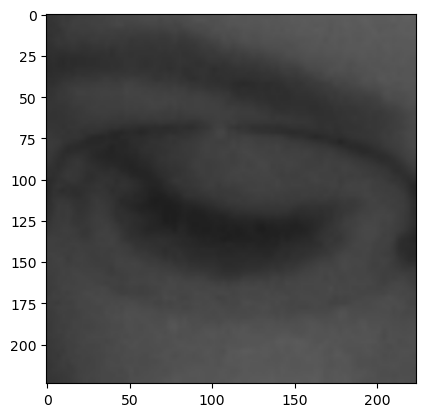

In [50]:
plt.imshow(new_array)

In [51]:
training_Data = []

def create_training_Data(): 
    for category in Classes:
        path = os. path. join(Datadirectory, category)
        class_num = Classes. index(category) ## 0 1,
        for img in os. listdir(path) :
            try:
                img_array = cv2. imread(os-path. join(path, img), cv2. IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor (img_array, cv2. COLOR,_GRAY2RGB)
                new_array= cv2. resize(backtorgb, (img_size, img_size))
                training_Data. append ([new_array, class_num])
            except Exception as e:
                pass

In [52]:
create_training_Data()

In [53]:
print(len(training_Data))

0


In [54]:
import os

Datadirectory = "/Users/priyanka/Downloads/mrleyedataset"
Classes = ["Close-Eyes", "Open-Eyes"]

for category in Classes:
    path = os.path.join(Datadirectory, category)
    print(f"Checking path: {path}")  # Debugging step

    if not os.path.exists(path):
        print(f"Error: The directory '{path}' does not exist.")
        continue  # Skip if the folder is missing

    images = os.listdir(path)
    print(f"Found {len(images)} images in {category}")


Checking path: /Users/priyanka/Downloads/mrleyedataset/Close-Eyes
Found 41946 images in Close-Eyes
Checking path: /Users/priyanka/Downloads/mrleyedataset/Open-Eyes
Found 42952 images in Open-Eyes


In [55]:
def create_training_Data(): 
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  # Labels: 0 for Close-Eyes, 1 for Open-Eyes

        if not os.path.exists(path):
            print(f"❌ ERROR: Path '{path}' does not exist!")
            continue  

        for img in os.listdir(path):
            img_path = os.path.join(path, img)

            # Ensure it's an image file
            if not img.lower().endswith(('.png', '.jpg', '.jpeg')):
                print(f"Skipping non-image file: {img}")
                continue

            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            if img_array is None:
                print(f"⚠️ WARNING: Could not read {img_path}")
                continue  

            backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
            new_array = cv2.resize(backtorgb, (224, 224))  # Resize images

            training_Data.append([new_array, class_num])

# Call the function
create_training_Data()
print(f"✅ Total images loaded: {len(training_Data)}")


✅ Total images loaded: 84898


In [ ]:
x, y = [], []
for features, label in training_Data:
    x.append(features)
    y.append(label)

if len(x) == 0:
    raise ValueError("❌ ERROR: No training data available!")

x = np.array(x, dtype="float32") / 255.0  # Normalize pixel values
y = np.array(y, dtype="int")


In [ ]:
new_model.fit(x, y, epochs=5, validation_split=0.1)


In [ ]:
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
